# 商业周期

## 概览

在本讲座中，我们将从实证的角度分析商业周期。

商业周期是经济活动随时间波动的现象。

这包括扩张期（也称为繁荣期）和收缩期（也称为衰退期）。

在本讲中，我们将使用来自[世界银行](https://documents.worldbank.org/en/publication/documents-reports/api)和[FRED](https://fred.stlouisfed.org/)的经济指标。

除了Anaconda中包含的包之外，本讲还需要以下的包：

In [1]:
!pip install wbgapi
!pip install pandas-datareader

接下来我们导入本讲所需的Python包。

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import wbgapi as wb
import pandas_datareader.data as web

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

下面几行代码是用来设置图形参数和国家/地区名的中英文对照的。

In [3]:
# 设置图形参数
cycler = plt.cycler(linestyle=['-', '-.', '--', ':'], 
        color=['#377eb8', '#ff7f00', '#4daf4a', '#ff334f'])
plt.rc('axes', prop_cycle=cycler)

name_cn = pd.read_csv('../lectures/datasets/country_code_cn.csv').set_index('name_chinese')

## 数据获取

我们将使用世界银行的数据API `wbgapi` 和 `pandas_datareader` 来检索数据。

我们可以使用 `wb.series.info` 并使用参数 `q` 来查询来自[世界银行](https://www.worldbank.org/en/home)的可用数据。

例如，我们可以试着检索 GDP 增长数据 ID 以查询 GDP 增长数据。

In [4]:
wb.series.info(q='GDP growth')

id,value
NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
,1 elements


现在我们使用这个系列 ID 来获取数据。

In [5]:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
economy,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.679020
GRC,Greece,NaN,13.203841,0.364811,11.844866,9.409677,10.768011,6.494501,5.669485,7.203719,...,0.792225,-0.228302,-0.031795,1.473125,2.064673,2.277181,-9.196231,8.654498,5.743649,2.332124
GBR,United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,...,3.194637,2.222888,1.921710,2.656505,1.405190,1.624475,-10.296919,8.575951,4.839085,0.339966
ARG,Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,...,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.441812,5.269880,-1.611002
USA,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,2.523820,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556


我们可以查看系列的元数据，了解有关该系列的更多信息（点击展开）。

In [6]:
wb.series.metadata.get('NY.GDP.MKTP.KD.ZG')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"An economy's growth is measured by the change in the volume of its output or in the real incomes of its residents. The 2008 United Nations System of National Accounts (2008 SNA) offers three plausible indicators for calculating growth: the volume of gross domestic product (GDP), real gross domestic income, and real gross national income. The volume of GDP is the sum of value added, measured at constant prices, by households, government, and industries operating in the economy. GDP accounts for all domestic production, regardless of whether the income accrues to domestic or foreign institutions."
IndicatorName,GDP growth (annual %)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs. In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult. Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation. Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the skill and methods of the compiling statisticians. Rebasing of national accounts can alter the measured growth rate of an economy and lead to breaks in series that affect the consistency of data over time. When countries rebase their national accounts, they update the weights assigned to various components to better reflect current patterns of production or uses of output. The new base year should represent normal operation of the economy - it should be a year without major shocks or distortions. Some developing countries have not rebased their national accounts for many years. Using an old base year can be misleading because implicit price and volume weights become progressively less relevant and useful. To obtain comparable series of constant price data for computing aggregates, the World Bank rescales GDP and value added by industrial origin to a common reference year. Because rescaling changes the implicit weights used in forming regional and income group aggregates, aggregate growth rates are not comparable with those from earlier editions with different base years. Rescaling may result in a discrepancy between the rescaled GDP and the sum of the rescaled components. To avoid distortions in the growth rates, the discrepancy is left unallocated. As a result, the weigh

(gdp_growth)=
## GDP 增长率

首先，让我们来看看GDP增长率。

我们先获取世界银行的数据并进行数据清洗。

In [7]:
# 使用ID获取数据
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

我们把数据打印出来看一看

In [8]:
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.679020
Greece,NaN,13.203841,0.364811,11.844866,9.409677,10.768011,6.494501,5.669485,7.203719,11.563668,...,0.792225,-0.228302,-0.031795,1.473125,2.064673,2.277181,-9.196231,8.654498,5.743649,2.332124
United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,1.939138,...,3.194637,2.222888,1.921710,2.656505,1.405190,1.624475,-10.296919,8.575951,4.839085,0.339966
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.441812,5.269880,-1.611002
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,2.523820,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556


接下来我们写一个函数来绘制各个国家的时间序列图并突出显示经济衰退的时期。

In [9]:
def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    """
    绘制数据的时间序列图并突出显示经济衰退的时期。

    参数
    ----------
    data : pd.DataFrame
        要绘制的数据
    country : str
        要绘制的国家名称
    ylabel : str
        y轴的标签
    txt_pos : float
        衰退标签的位置
    ylim : float
        y轴的限制
    ax : matplotlib.axes._subplots.AxesSubplot
        绘图的轴向
    g_params : dict
        曲线的参数
    b_params : dict
        衰退高亮的参数
    t_params : dict
        衰退标签的参数
    baseline : float, optional
        图表中的虚线基线，默认为0
    
    返回
    -------
    ax : matplotlib.axes.Axes
        带有图表的轴向。
    """
    
    country_cn = name_cn.loc[country]['name']

    ax.plot(data.loc[country_cn], label=country, **g_params)
    
    # 高亮衰退
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if ylim != None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos, '石油危机\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos, '90年代经济衰退\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos, '全球金融危机\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos, 'Covid-19\n(2020)', **t_params)

    # 添加基线
    if baseline != None:
        ax.axhline(y=baseline, 
                   color='black', 
                   linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# 定义图形参数
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

让我们先从美国开始

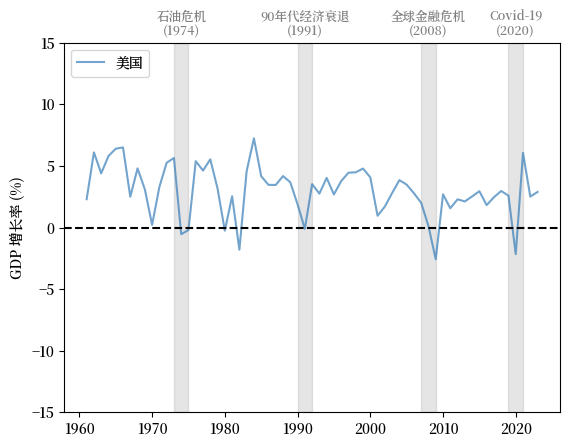

In [10]:
fig, ax = plt.subplots()

country = '美国'
ylabel = 'GDP 增长率 (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

从图中我们可以看到，GDP 平均增长率呈现正值，并且随着时间的推移呈现轻微下降趋势。

我们也看到GDP平均增长率的波动随时间变化，其中一些波动幅度很大。

让我们再多看一些国家的趋势并与美国比较。

英国 (UK) 的模式与美国类似，增长率缓慢下降，波动显著。

我们注意到增长率在 Covid-19 大流行期间的大幅下跌。

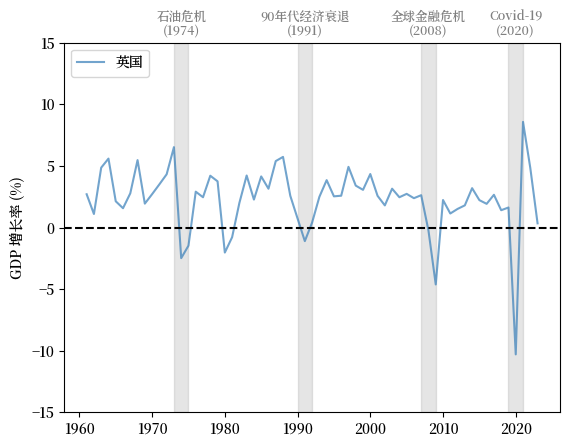

In [11]:
fig, ax = plt.subplots()

country = '英国'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

接下来我们看看日本，它在1960年代和1970年代经历了快速增长，并在过去二十年里增长放缓。

增长率的大幅下降与 1970 年代的石油危机、全球金融危机（GFC）和 Covid-19 大流行同时发生。

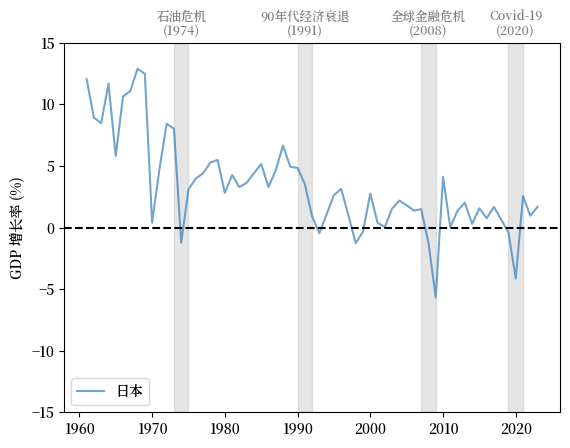

In [12]:
fig, ax = plt.subplots()

country = '日本'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

现在让我们研究希腊。

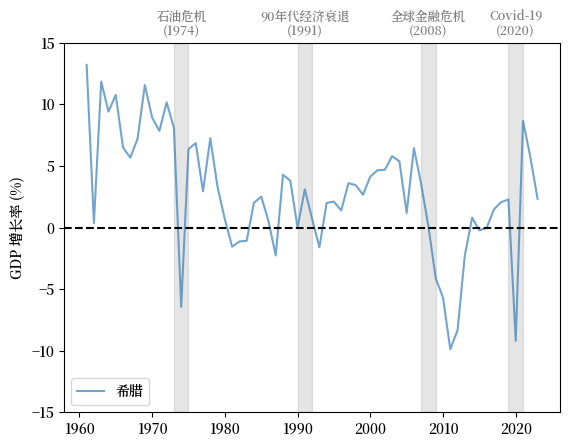

In [13]:
fig, ax = plt.subplots()

country = '希腊'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

希腊在2010-2011年左右经历了GDP增长率的大幅下降，这正是希腊债务危机最严重的时期。

接下来我们来看看阿根廷。

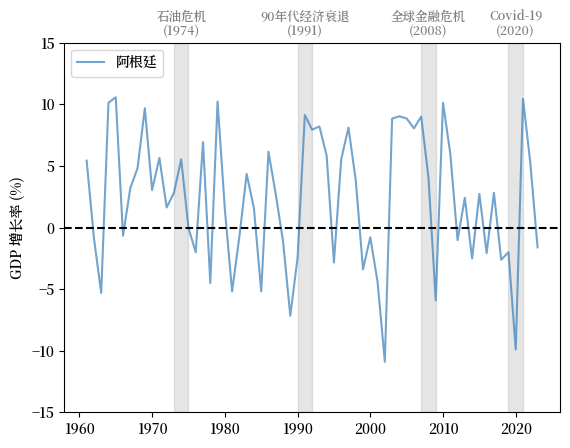

In [14]:
fig, ax = plt.subplots()

country = '阿根廷'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

注意阿根廷经历的波动周期远比上述国家剧烈。

与此同时，阿根廷的增长率在20世纪70年代和90年代两次发达经济体衰退期间并未下降。

## 失业

失业率是衡量商业周期的另一个重要指标。

我们使用 [FRED](https://fred.stlouisfed.org/) 提供的 [1929-1942](https://fred.stlouisfed.org/series/M0892AUSM156SNBR) 年和 [1948-2022](https://fred.stlouisfed.org/series/UNRATE) 年的失业率数据以及[人口普查局](https://www.census.gov/library/publications/1975/compendia/hist_stats_colonial-1970.html) 估算的 1942-1948 年的失业率数据来研究失业问题。

In [15]:
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(1942, 6, 1)

unrate_history = web.DataReader('M0892AUSM156SNBR', 
                    'fred', start_date,end_date)
unrate_history.rename(columns={'M0892AUSM156SNBR': 'UNRATE'}, 
                inplace=True)

start_date = datetime.datetime(1948, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

unrate = web.DataReader('UNRATE', 'fred', 
                    start_date, end_date)

接下来我们绘制美国从1929年到2022年的失业率，以及由美国国家经济研究局（NBER）定义的经济衰退期。

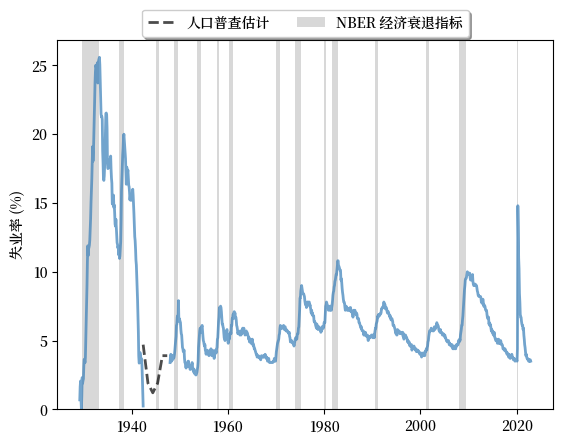

In [16]:
# 使用人口普查局估计的1942年到1948年间的失业率数据
years = [datetime.datetime(year, 6, 1) for year in range(1942, 1948)]
unrate_census = [4.7, 1.9, 1.2, 1.9, 3.9, 3.9]

unrate_census = {'DATE': years, 'UNRATE': unrate_census}
unrate_census = pd.DataFrame(unrate_census)
unrate_census.set_index('DATE', inplace=True)

# 获取由 NBER 定义的经济衰退期
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)

fig, ax = plt.subplots()

ax.plot(unrate_history, **g_params, 
        color='#377eb8', 
        linestyle='-', linewidth=2)
ax.plot(unrate_census, **g_params, 
        color='black', linestyle='--', 
        label='人口普查估计', linewidth=2)
ax.plot(unrate, **g_params, color='#377eb8', 
        linestyle='-', linewidth=2)

# 根据 NBER 经济衰退指标绘制灰色方框
ax.fill_between(nber.index, 0, 1,
                where=nber['USREC']==1, 
                color='grey', edgecolor='none',
                alpha=0.3, 
                transform=ax.get_xaxis_transform(), 
                label='NBER 经济衰退指标')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
ax.set_ylabel('失业率 (%)')

plt.show()

图表显示：

* 劳动力市场的扩张和收缩与经济衰退高度相关。
* 周期一般是不对称的：失业率的急剧上升后面通常跟随着缓慢的复苏。

它还向我们展示了美国在疫情后复苏期间劳动力市场状况的独特性。

劳动力市场在2020-2021年的冲击后以前所未有的速度复苏。

(synchronization)=
## 同步化

在我们的{ref}`之前的讨论<gdp_growth>`中，我们发现发达经济体的衰退期相对同步。

同时，这种同步现象直到21世纪才在阿根廷出现。

让我们进一步研究这种趋势。

通过轻微的修改，我们可以使用我们之前的函数来绘制包括多个国家的图表。

In [17]:
def plot_comparison(data, countries, 
                        ylabel, txt_pos, y_lim, ax, 
                        g_params, b_params, t_params, 
                        baseline=0):
    """
    在同一图表上绘制多个系列

    参数
    ----------
    data : pd.DataFrame
        要绘制的数据
    countries : list
        要绘制国家的列表
    ylabel : str
        y轴的标签
    txt_pos : float
        衰退标签的位置
    y_lim : float
        y轴的限制
    ax : matplotlib.axes._subplots.AxesSubplot
        绘图的轴向
    g_params : dict
        曲线的参数
    b_params : dict
        衰退高亮的参数
    t_params : dict
        衰退标签的参数
    baseline : float, optional
        在图表中的虚线基线，默认为0
    
    返回
    -------
    ax : matplotlib.axes.Axes
        带有绘图的轴向。
    """
    
    # 允许函数处理多个系列
    for country in countries:
        country_cn = name_cn.loc[country]['name']
        ax.plot(data.loc[country_cn], label=country, **g_params)
    
    # 高亮衰退期
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if y_lim != None:
        ax.set_ylim([-y_lim, y_lim])
    ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos, '石油危机\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos, '90年代经济衰退\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos, '全球金融危机\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos, 'Covid-19\n(2020)', **t_params) 
    if baseline != None:
        ax.hlines(y=baseline, xmin=ax.get_xlim()[0], 
                  xmax=ax.get_xlim()[1], color='black', 
                  linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# 定义图形参数 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

在此，我们对发达经济体和发展中经济体的GDP增长率进行比较。

In [18]:
# 获取GDP增长率数据
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['CHN', 'USA', 'DEU', 'BRA', 'ARG', 'GBR', 'JPN', 'MEX'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

我们将英国、美国、德国和日本作为发达经济体的例子。

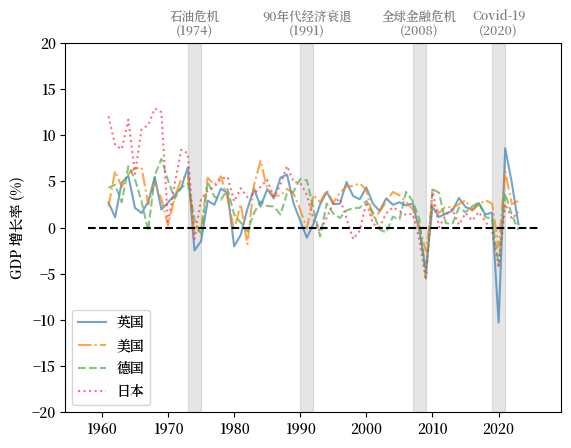

In [19]:
fig, ax = plt.subplots()

countries = ['英国', '美国', '德国', '日本']
ylabel = 'GDP 增长率 (%)'
plot_comparison(gdp_growth, countries, 
                ylabel, 0.1, 20, ax, 
                g_params, b_params, t_params)

plt.show()

我们选择巴西、中国、阿根廷和墨西哥作为发展中经济体的代表。

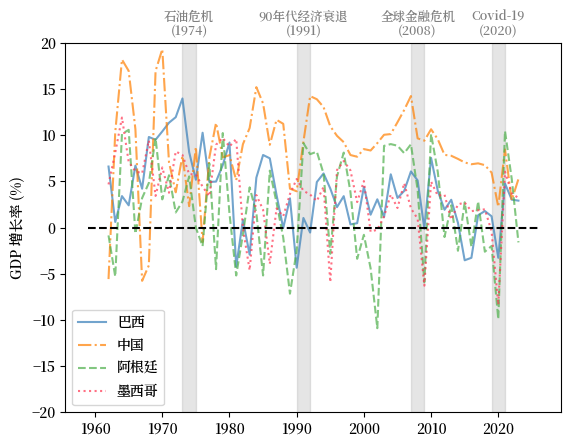

In [20]:
fig, ax = plt.subplots()
countries = ['巴西', '中国', '阿根廷', '墨西哥']
plot_comparison(gdp_growth.loc[name_cn.loc[countries]['name'], 1962:], 
                countries, ylabel, 
                0.1, 20, ax, 
                g_params, b_params, t_params)
plt.show()

上述GDP增长率的比较表明，在21世纪全球的商业周期变得更加同步。

然而，新兴和不发达经济体的经济周期通常经历更加剧烈的变化。

尽管GDP增长实现了同步，但在衰退期间各国的经历常常有所不同。

我们使用失业率和劳动市场的复苏作为另一个例子。

这里我们比较了美国、英国、日本和法国的失业率。

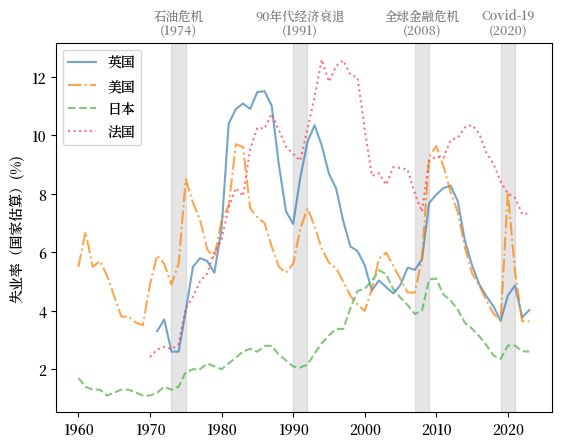

In [21]:
unempl_rate = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS',
    ['USA', 'FRA', 'GBR', 'JPN'], labels=True)
unempl_rate = unempl_rate.set_index('Country')
unempl_rate.columns = unempl_rate.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = ['英国', '美国', '日本', '法国']
ylabel = '失业率（国家估算）(%)'
plot_comparison(unempl_rate, countries, 
                ylabel, 0.05, None, ax, g_params, 
                b_params, t_params, baseline=None)
plt.show()

我们看到，工会力量强大的法国在受到负面冲击后，劳动力市场的复苏通常会相对缓慢。

我们还注意到，日本的失业率一直非常低且稳定。

## 领先指标和相关因素 

研究领先指标和相关因素有助于决策者了解商业周期的原因和结果。

我们将从消费、生产和信贷水平来讨论潜在的领先指标和相关因素。

### 消费

消费取决于消费者对其收入的信心以及未来经济的整体表现。

密歇根大学发布的[消费者信心指数](https://fred.stlouisfed.org/series/UMCSENT)是一个被广泛引用的消费者信心指标。

这里我们绘制了密歇根大学消费者信心指数和年同比 
[居民消费价格指数](https://fred.stlouisfed.org/series/CPILFESL) (CPI) 的变化。

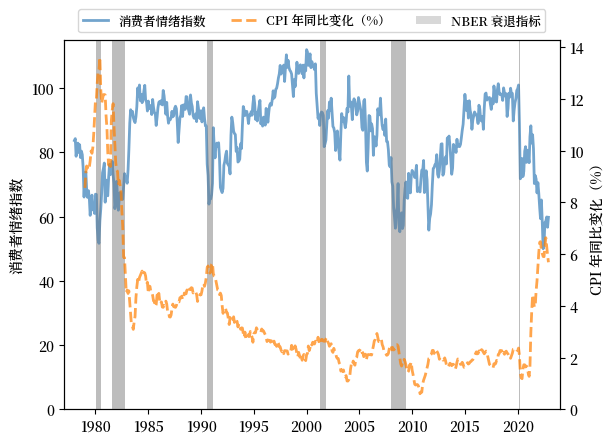

In [22]:
start_date = datetime.datetime(1978, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# 限制图表的时间范围
start_date_graph = datetime.datetime(1977, 1, 1)
end_date_graph = datetime.datetime(2023, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)
consumer_confidence = web.DataReader('UMCSENT', 'fred', 
                                start_date, end_date)

fig, ax = plt.subplots()
ax.plot(consumer_confidence, **g_params, 
        color='#377eb8', linestyle='-', 
        linewidth=2)
ax.fill_between(nber.index, 0, 1, 
            where=nber['USREC']==1, 
            color='grey', edgecolor='none',
            alpha=0.3, 
            transform=ax.get_xaxis_transform(), 
            label='NBER 衰退指标')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylabel('消费者情绪指数')

# 在另一个y轴上绘制 CPI
ax_t = ax.twinx()
inflation = web.DataReader('CPILFESL', 'fred', 
                start_date, end_date).pct_change(12)*100

# 在图例中添加 CPI 而不重复绘图线条
ax_t.plot(2020, 0, **g_params, linestyle='-', 
          linewidth=2, label='消费者情绪指数')
ax_t.plot(inflation, **g_params, 
          color='#ff7f00', linestyle='--', 
          linewidth=2, label='CPI 年同比变化（%）')

ax_t.fill_between(nber.index, 0, 1,
                  where=nber['USREC']==1, 
                  color='grey', edgecolor='none',
                  alpha=0.3, 
                  transform=ax.get_xaxis_transform(), 
                  label='NBER 衰退指标')
ax_t.set_ylim([0, ax_t.get_ylim()[1]])
ax_t.set_xlim([start_date_graph, end_date_graph])
ax_t.legend(loc='upper center',
            bbox_to_anchor=(0.5, 1.1),
            ncol=3, fontsize=9)
ax_t.set_ylabel('CPI 年同比变化（%）')
plt.show()

我们看到：
* 消费者情绪在经济扩张期间常常保持高位，并在衰退前下降。
* 消费者情绪和CPI之间存在明显的负相关性。

当消费者商品的价格上涨时，消费者信心会下降。

这种趋势在[滞胀](https://en.wikipedia.org/wiki/Stagflation)期间更为明显。

### 生产

实际工业产出与经济衰退高度相关。

然而，它不是一个领先指标，因为产出收缩的高峰通常比消费者信心和通货膨胀的减弱要晚。

我们绘制了1919年到2022年美国实际工业产出年变化用于展示此趋势。

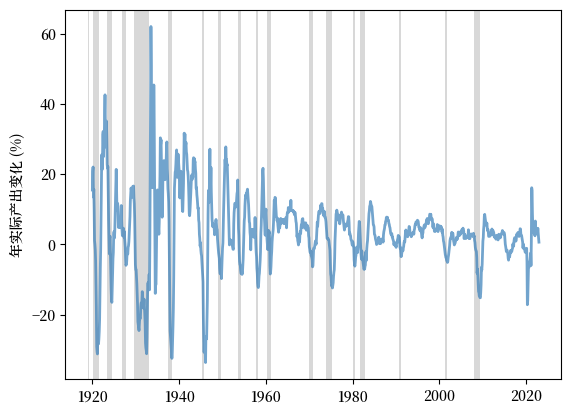

In [23]:
start_date = datetime.datetime(1919, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', 
                    start_date, end_date)
industrial_output = web.DataReader('INDPRO', 'fred', 
                    start_date, end_date).pct_change(12)*100

fig, ax = plt.subplots()
ax.plot(industrial_output, **g_params, 
        color='#377eb8', linestyle='-', 
        linewidth=2, label='工业生产指数')
ax.fill_between(nber.index, 0, 1,
                where=nber['USREC']==1, 
                color='grey', edgecolor='none',
                alpha=0.3, 
                transform=ax.get_xaxis_transform(), 
                label='NBER衰退指标')
ax.set_ylim([ax.get_ylim()[0], ax.get_ylim()[1]])
ax.set_ylabel('年实际产出变化 (%)')
plt.show()

我们从图中可以观察到各次经济衰退的延迟收缩。

### 信贷水平

我们最后一个观察的相关因素是信贷水平。

信贷收缩经常在经济衰退期间发生，因为出贷方变得更加谨慎，借款人也更加犹豫是否要承担更多的债务。

这是由于整体经济活动的减少和对未来前景的悲观预期。

一个例子是英国银行对私营部门的国内信贷。

下面的图表显示了1970年到2022年英国银行对私营部门的国内信贷占 GDP 的百分比。。

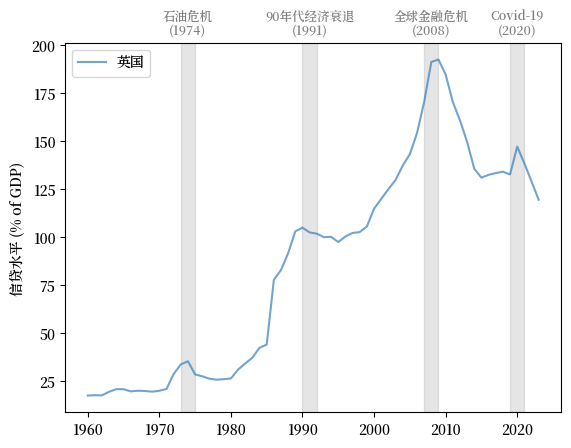

In [24]:
private_credit = wb.data.DataFrame('FS.AST.PRVT.GD.ZS', 
                ['GBR'], labels=True)
private_credit = private_credit.set_index('Country')
private_credit.columns = private_credit.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = '英国'
ylabel = '信贷水平 (% of GDP)'
ax = plot_series(private_credit, countries, 
                 ylabel, 0.05, ax, g_params, b_params, 
                 t_params, ylim=None, baseline=None)
plt.show()

我们可以看到信贷在经济扩张期间上升，在衰退后停滞甚至收缩。